In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# converts a bedgraph file into a pandas dataframe
data1 = pd.read_csv('MSp134.bedgraph', sep= '\t', names = ['Chrom','Beginning', 'End', 'Coverage'])
data2 = pd.read_csv('MSp135.bedgraph', sep= '\t', names = ['Chrom','Beginning', 'End', 'Coverage'])
data3 = pd.read_csv('MSp136.bedgraph', sep= '\t', names = ['Chrom','Beginning', 'End', 'Coverage'])
data4 = pd.read_csv('MSp137.bedgraph', sep= '\t', names = ['Chrom','Beginning', 'End', 'Coverage'])

data = data1.append(data2, ignore_index='True')
data = data.append(data3, ignore_index='True')
data = data.append(data4, ignore_index='True')

/tmp/ipykernel_1741732/3832325024.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data1.append(data2, ignore_index='True')
/tmp/ipykernel_1741732/3832325024.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data3, ignore_index='True')
/tmp/ipykernel_1741732/3832325024.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data4, ignore_index='True')


In [8]:
i = 0
# counter for each row of the converted BED file
k = 0
# keeps track of last row number at the end of each region
j = 1
# counts the number of promoters
l = 0
# counts the number of "one-liners"

row = data.shape[0]

myFile = pd.DataFrame(columns=['Promoter Number','Chrom', 'Start', 'Stop', 'Length', 'Avg', 'Med', 'Max Coverage'])

while i < row-3:
    end = data.iat[i,2]
    start = data.iat[i+1,1]
    cov = 0
    maximum = 0
    mean = 0
    

    if (end == start):
        while end == start:
            
            if i == row: 
                end = data.iat[i,2]
                break
            
            else: 
                # print(end,start,"2")
                end = data.iat[i,2]
                start = data.iat[i+1,1]
                i += 1
                newFrame = data.iloc[k:i]

                cov = newFrame.loc[i-1, 'Coverage']
   
        
        chrom = newFrame.loc[i-1, 'Chrom']
        promStart = newFrame.loc[k + 1, 'Beginning']
        promEnd = newFrame.loc[i-1, 'End']
        promLen = promEnd - promStart
        mean = newFrame['Coverage'].mean()
        median = newFrame['Coverage'].median()
        maximum = newFrame['Coverage'].max()


        myFile.loc[j, 'Promoter Number'] = j
        myFile.loc[j, 'Chrom'] = chrom
        myFile.loc[j, 'Start'] = promStart
        myFile.loc[j, 'Stop'] = promEnd
        myFile.loc[j, 'Length'] = promLen
        myFile.loc[j, 'Avg'] = mean
        myFile.loc[j, 'Med'] = median
        myFile.loc[j, 'Max Coverage'] = maximum

        k = i
        j += 1
        cov = 0
        maximum = 0
        mean = 0
        
    else:
        # print('this is a one-liner')
        i += 2 
        l += 1
        
print(l)
print(myFile)




1790
      Promoter Number   Chrom   Start    Stop Length        Avg   Med  \
1                   1    chrI    2171    2664    493    13.0625  11.5   
2                   2    chrI    9140    9264    124        2.5   2.5   
3                   3    chrI    9707   10090    383  12.344828  12.0   
4                   4    chrI   11798   12016    218   2.857143   3.0   
5                   5    chrI   23742   28342   4600        2.0   1.5   
...               ...     ...     ...     ...    ...        ...   ...   
11807           11807  chrXVI  939667  939925    258     39.375  42.0   
11808           11808  chrXVI  942820  943392    572  21.114286  23.0   
11809           11809  chrXVI  943595  944004    409   5.909091   6.0   
11810           11810  chrXVI  946691  946802    111        3.0   3.0   
11811           11811  chrXVI  947339  947831    492   5.230769   4.0   

      Max Coverage  
1               19  
2                4  
3               25  
4                5  
5            

In [ ]:
path = r'promoters.txt'
with open (path, 'a') as f:
    fileString = myFile.to_string()
    f.write(fileString)

In [5]:
print(l,"one-liners")

1790 one-liners


372529
-945168


(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.1806e+04, 1.0000e+00, 1.0000e+00]),
 array([-945168.0, -813398.3, -681628.6, -549858.8999999999,
        -418089.19999999995, -286319.5, -154549.79999999993,
        -22780.09999999986, 108989.6000000001, 240759.30000000005,
        372529.0], dtype=object),
 <BarContainer object of 10 artists>)

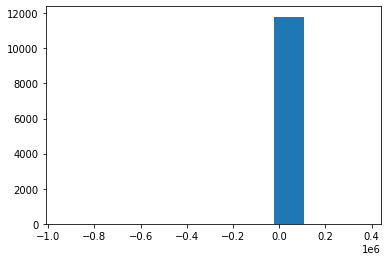

In [6]:
lengthData = myFile['Length']
print(lengthData.max())
print(lengthData.min())
plt.hist(lengthData)


chrXVI
chrI


(array([ 933., 2364.,  382.,  740., 1310., 1432.,  926.,  669., 1879.,
        1176.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

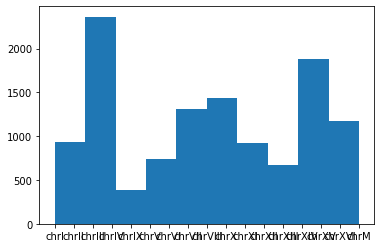

In [7]:
promData = myFile['Chrom']
print(promData.max())
print(promData.min())
plt.hist(promData)